In [1]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks')
sns.set_style('darkgrid')
from sympy import* 

In [2]:
z= symbols('z')
s = symbols('s')
D = Function('D_L^F')(z)
theta = Function('theta')(z)
E_z=Function('E_z')(z)
W_z = Function('W_z')(z)
T = Function('T')('s')

In [3]:
Omega_m,Omega_k,Omega_DE = symbols('Omega_m Omega_k Omega_DE', real = True, constant = True)
Omega_m = 0.3
Omega_DE = 0.7
Omega_k = -0.2

In [4]:
theta_z = (Omega_m*(1+z)**3 + (1-Omega_m) + (Omega_k*Omega_m*(1+z)*D**2) + ((Omega_k*(1-Omega_m)*D**2)/(1+z)**2)
           -((1-Omega_k - Omega_DE)*((1+z)**3)) -Omega_k*(1+z)**2);(theta_z) 

(0.015*z + 0.015)*D_L^F(z)**2 + 0.05*(z + 1)**3 - 0.05*(z + 1)**2 + 0.7 + 0.035*D_L^F(z)**2/(z + 1)**2

In [5]:
g = (theta_z.diff(z));g

-0.1*z + 2*(0.015*z + 0.015)*D_L^F(z)*Derivative(D_L^F(z), z) + 0.15*(z + 1)**2 + 0.015*D_L^F(z)**2 - 0.1 + 0.07*D_L^F(z)*Derivative(D_L^F(z), z)/(z + 1)**2 - 0.07*D_L^F(z)**2/(z + 1)**3

In [6]:
p = simplify((g/theta_z));p

((z + 1)**3*(-0.1*z + 0.15*(z + 1)**2 + 0.03*(z + 1)*D_L^F(z)*Derivative(D_L^F(z), z) + 0.015*D_L^F(z)**2 - 0.1) + 0.07*(z + 1)*D_L^F(z)*Derivative(D_L^F(z), z) - 0.07*D_L^F(z)**2)/((z + 1)*((z + 1)**2*(0.05*(z + 1)**3 - 0.05*(z + 1)**2 + 0.015*(z + 1)*D_L^F(z)**2 + 0.7) + 0.035*D_L^F(z)**2))

In [7]:
#W_z = ((p*(1+z))/3) -1

### Numerical Estimation of $D_L^F(z)$

### $D_L^F(z) = \frac{(1+z)}{\sqrt{s\Omega_m}}\left[T(s) - T(\frac{s}{1+z})\right]$

### $s = \sqrt[3]{\frac{1-\Omega_m}{\Omega_m}}$

In [8]:
s = cbrt((1-Omega_m)/Omega_m);s

1.32635240263213

In [9]:
T = 2*sqrt(s)*(1-(1/14)*s**3);T

1.91945623277367

In [10]:
T_s = 2*sqrt(s/(1+z))*(1-(1/14)*(s/(1+z))**3);T_s

2.30334747932841*(1 - 0.166666666666667/(z + 1)**3)*sqrt(1/(z + 1))

In [11]:
f = (((1+z)/(sqrt(s*Omega_m)))*((T-T_s)));f

(1.58529433768533*z + 1.58529433768533)*(-2.30334747932841*(1 - 0.166666666666667/(z + 1)**3)*sqrt(1/(z + 1)) + 1.91945623277367)

In [12]:
E_z = sqrt(Omega_m*(1+z)**3 - (1-Omega_m));E_z

0.836660026534076*sqrt(0.428571428571429*(z + 1)**3 - 1)

In [13]:
d=((1+z)/E_z) + (D /(1+z));d

1.19522860933439*(z + 1)/sqrt(0.428571428571429*(z + 1)**3 - 1) + D_L^F(z)/(z + 1)

In [14]:
W_z = ((p*(1+z))/3) -1

In [15]:
g = W_z.subs(D,f)

In [16]:
l=simplify(g)

In [20]:
# main_deal(l)

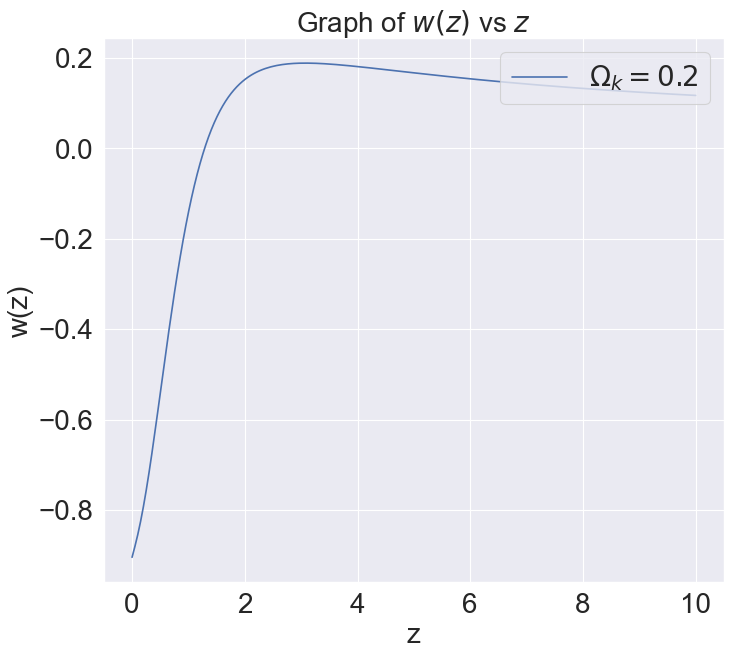

In [24]:
u = []
lulu = np.linspace(0,10,200) 
for i in lulu:
    t = l.subs(z, i)
    u.append(t)
figure(figsize=(10, 9), dpi=80)    
b = plt.plot(lulu,u)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('z',fontsize = 25)
plt.ylabel('w(z)',fontsize = 25)
plt.title('Graph of $w(z)$ vs $z$',fontsize = 25)
plt.legend(['$\Omega_k = 0.2$'],loc = 'upper right',fontsize = 25)

b : 0
r : 0.01
g : 0.05
cyan : 0.1
lime : 0.2
orange : 0.3
darkgreen : 0.4


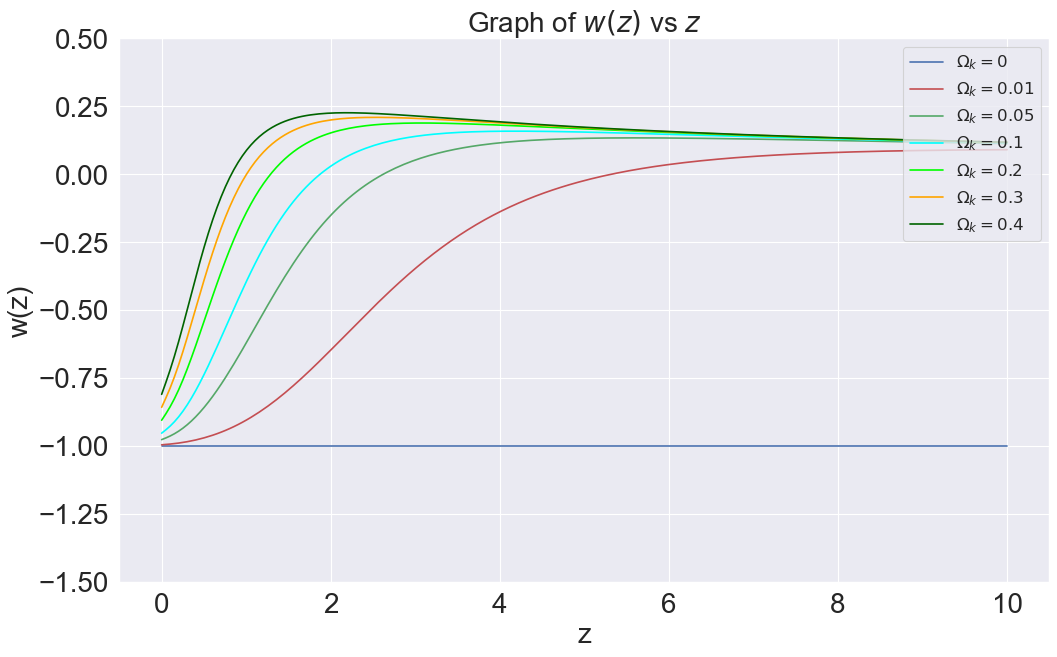

In [17]:
l=simplify(g)
#see=np.linspace(0.001,0.2,10)
col = ['b', 'r', 'g', 'cyan','lime','orange', 'darkgreen','r', 'r', 'r', 'r','r','r', 'r',]
lu = 0
see = [0, 0.01, 0.05, 0.1 ,0.2,0.3, 0.4]
figure(figsize=(15, 9), dpi=80)
for j in see:
    l1= l.subs(Omega_k,j)
    u = []
    lulu = np.linspace(0,10,200) 
    for i in lulu:
        t = l1.subs(z, i)
        u.append(t)    
    plt.plot(lulu,u,color=col[lu]) 
    print(col[lu], ":", j)
    lu +=1
#plt.xscale('log')
#plt.xlim(0,1)
plt.ylim(-1.5,0.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Graph of $w(z)$ vs $z$',fontsize = 25)
plt.xlabel('z',fontsize = 25)
plt.ylabel('w(z)',fontsize =25)
plt.legend(['$\Omega_k = 0$','$\Omega_k = 0.01$', '$\Omega_k = 0.05$', '$\Omega_k = 0.1$', '$\Omega_k = 0.2$', '$\Omega_k = 0.3$', '$\Omega_k = 0.4$',],loc = 'upper right',fontsize=15)
# plt.show()

b : 0.01
r : 0.05
g : 0.1
cyan : 0.2
lime : 0.3
orange : 0.4


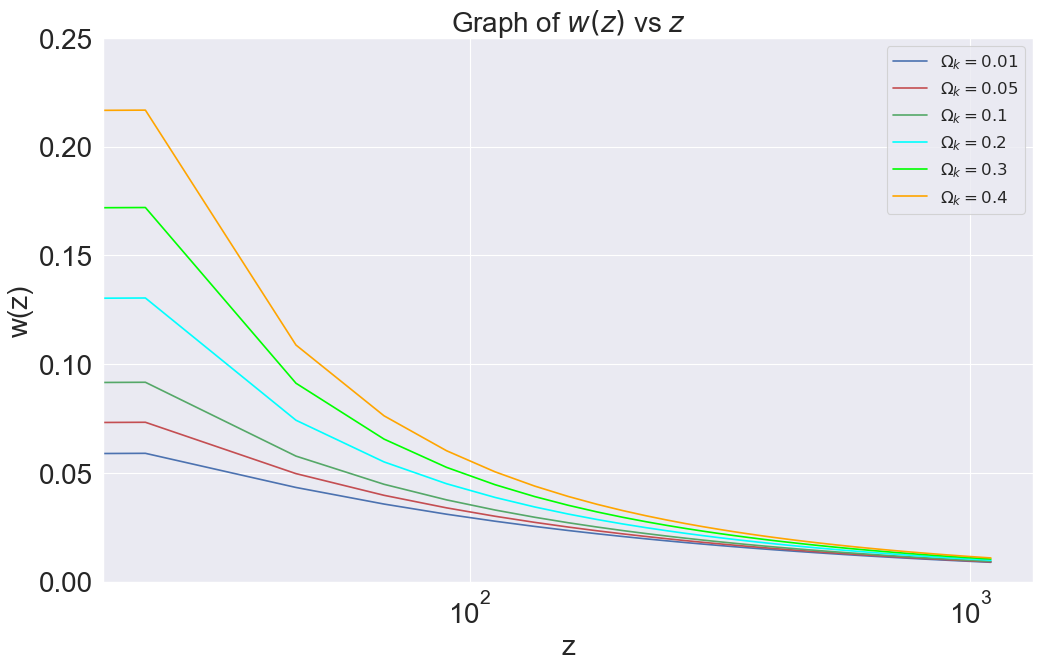

In [24]:
l=simplify(g)
#see=np.linspace(0.001,0.2,10)
col = ['b', 'r', 'g', 'cyan','lime','orange', 'darkgreen','r', 'r', 'r', 'r','r','r', 'r',]
lu = 0
see = [0.01, 0.05, 0.1 ,0.2,0.3, 0.4]
figure(figsize=(15, 9), dpi=80)
for j in see:
    l1= l.subs(Omega_k,j)
    u = []
    lulu = np.linspace(0,1100) 
    for i in lulu:
        t = l1.subs(z, i)
        u.append(t)    
    plt.plot(lulu,u,color=col[lu]) 
    print(col[lu], ":", j)
    lu +=1
plt.xscale('log')
#plt.xlim(0,1)
plt.ylim(0,0.25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Graph of $w(z)$ vs $z$',fontsize = 25)
plt.xlabel('z',fontsize = 25)
plt.ylabel('w(z)',fontsize =25)
plt.legend(['$\Omega_k = 0.01$', '$\Omega_k = 0.05$', '$\Omega_k = 0.1$', '$\Omega_k = 0.2$', '$\Omega_k = 0.3$', '$\Omega_k = 0.4$',],loc = 'upper right',fontsize=15)
# plt.show()

darkgreen : 0
r : -0.01
g : -0.05
cyan : -0.1
lime : -0.2
orange : -0.3
blue : -0.4


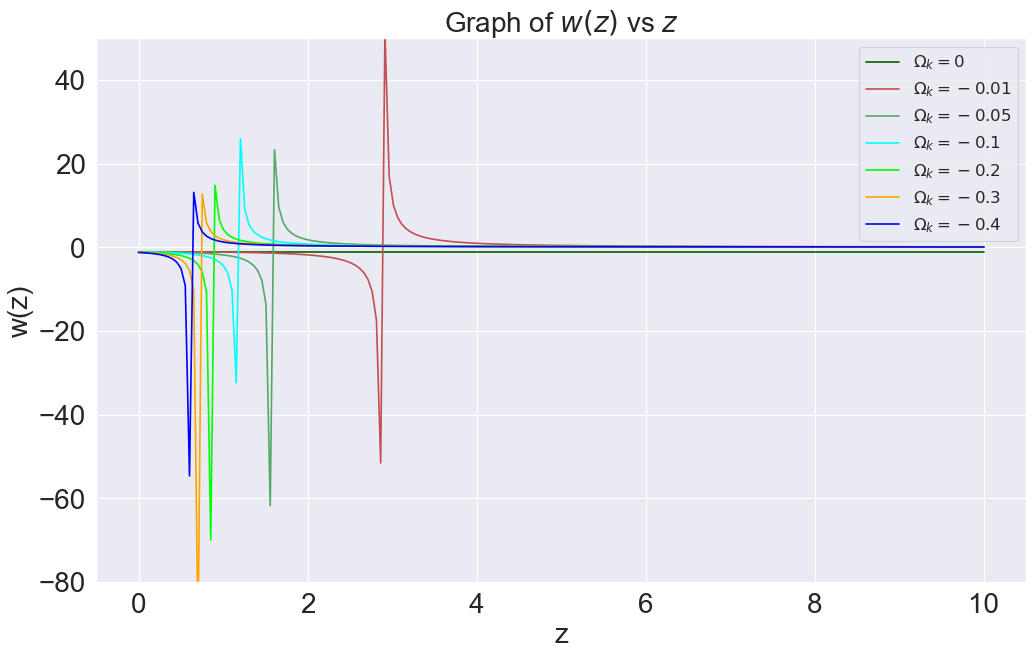

In [19]:
l=simplify(g)
#see=np.linspace(0.001,0.2,10)
col = ['darkgreen', 'r', 'g', 'cyan','lime','orange', 'blue','r', 'r', 'r', 'r','r','r', 'r',]
lu = 0
see = [0, -0.01, -0.05, -0.1 ,-0.2,-0.3, -0.4]
figure(figsize=(15, 9), dpi=80)
for j in see:
    l1= l.subs(Omega_k,j)
    u = []
    lulu = np.linspace(0,10,200) 
    for i in lulu:
        t = l1.subs(z, i)
        u.append(t)    
    plt.plot(lulu,u,color=col[lu]) 
    print(col[lu], ":", j)
    lu +=1
#plt.xscale('log')
#plt.xlim(0,1)
plt.ylim(-80,50)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Graph of $w(z)$ vs $z$',fontsize = 25)
plt.xlabel('z',fontsize = 25)
plt.ylabel('w(z)',fontsize =25)
plt.legend(['$\Omega_k = 0$','$\Omega_k = -0.01$', '$\Omega_k = -0.05$', '$\Omega_k = -0.1$', '$\Omega_k = -0.2$', '$\Omega_k = -0.3$', '$\Omega_k = -0.4$',],fontsize=15)
plt.show()

darkgreen : -0.01
r : -0.05
g : -0.1
cyan : -0.2
lime : -0.3
orange : -0.4


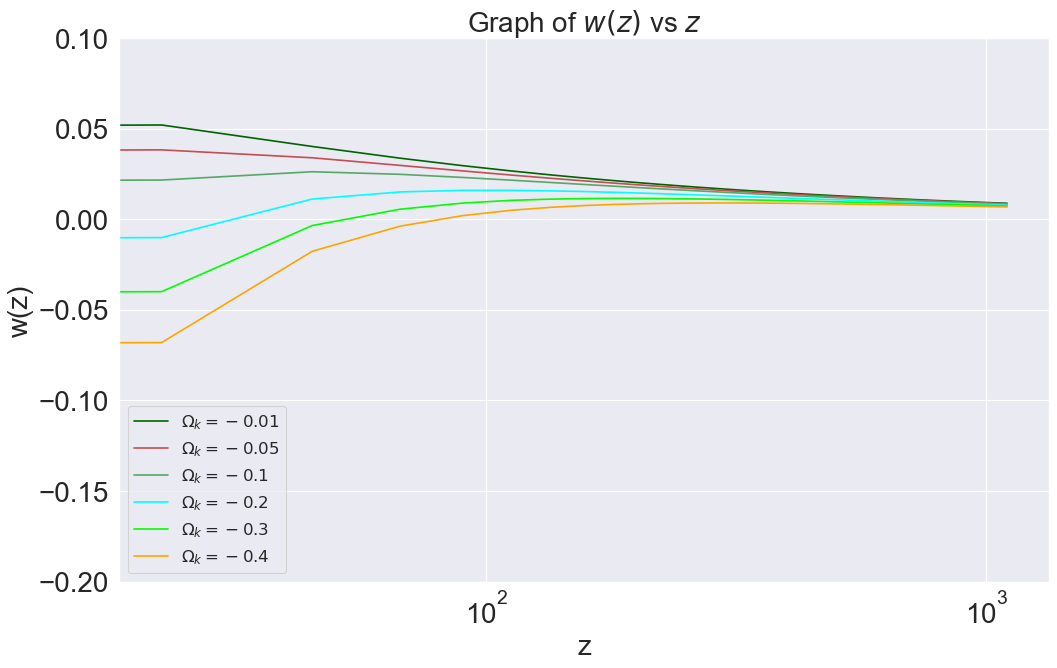

In [23]:
l=simplify(g)
#see=np.linspace(0.001,0.2,10)
col = ['darkgreen', 'r', 'g', 'cyan','lime','orange', 'blue','r', 'r', 'r', 'r','r','r', 'r',]
lu = 0
see = [-0.01, -0.05, -0.1 ,-0.2,-0.3, -0.4]
figure(figsize=(15, 9), dpi=80)
for j in see:
    l1= l.subs(Omega_k,j)
    u = []
    lulu = np.linspace(0,1100) 
    for i in lulu:
        t = l1.subs(z, i)
        u.append(t)    
    plt.plot(lulu,u,color=col[lu]) 
    print(col[lu], ":", j)
    lu +=1
plt.xscale('log')
#plt.xlim(0,1)
plt.ylim(-0.2,0.1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Graph of $w(z)$ vs $z$',fontsize = 25)
plt.xlabel('z',fontsize = 25)
plt.ylabel('w(z)',fontsize =25)
plt.legend(['$\Omega_k = -0.01$', '$\Omega_k = -0.05$', '$\Omega_k = -0.1$', '$\Omega_k = -0.2$', '$\Omega_k = -0.3$', '$\Omega_k = -0.4$',],fontsize=15)
plt.show()